In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Importing the data


*   We read in the data file
*   obtain data information
*   Visualize the information






In [3]:
miles_data = pd.read_csv('miles-driven.csv',sep='|')

In [4]:
miles_data.head()

,state,million_miles_annually
0,Alabama,64914
1,Alaska,4593
2,Arizona,59575
3,Arkansas,32953
4,California,320784


In [5]:
road_data = pd.read_csv('road-accidents.csv',comment='#',sep='|')

In [6]:
road_data.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39,30,80
1,Alaska,18.1,41,25,94
2,Arizona,18.6,35,28,96
3,Arkansas,22.4,18,26,95
4,California,12.0,35,28,89


In [ ]:
print(road_data.state.value_counts().sum())
print(miles_data.state.value_counts().sum())

51
51


In [7]:
all_data = road_data 
all_data['million_miles_annually']=miles_data['million_miles_annually']
all_data.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,million_miles_annually
0,Alabama,18.8,39,30,80,64914
1,Alaska,18.1,41,25,94,4593
2,Arizona,18.6,35,28,96,59575
3,Arkansas,22.4,18,26,95,32953
4,California,12.0,35,28,89,320784


In [8]:
all_data['target_var'] = all_data['drvr_fatl_col_bmiles'] * all_data['million_miles_annually']
all_data.head(10)

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,million_miles_annually,target_var
0,Alabama,18.8,39,30,80,64914,1220383.2
1,Alaska,18.1,41,25,94,4593,83133.3
2,Arizona,18.6,35,28,96,59575,1108095.0
3,Arkansas,22.4,18,26,95,32953,738147.2
4,California,12.0,35,28,89,320784,3849408.0
5,Colorado,13.6,37,28,95,46606,633841.6
6,Connecticut,10.8,46,36,82,31197,336927.6
7,Delaware,16.2,38,30,99,9028,146253.6
8,District of Columbia,5.9,34,27,100,3568,21051.2
9,Florida,17.9,21,29,94,191855,3434204.5


In [9]:
all_data['#speed']=(all_data['perc_fatl_speed']*all_data['target_var'])/100
all_data['#alchol']=(all_data['perc_fatl_alcohol']*all_data['target_var'])/100
all_data['#first']=(all_data['perc_fatl_1st_time']*all_data['target_var'])/100
all_data.head(10)

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,million_miles_annually,target_var,#speed,#alchol,#first
0,Alabama,18.8,39,30,80,64914,1220383.2,475949.448,366114.960,976306.560
1,Alaska,18.1,41,25,94,4593,83133.3,34084.653,20783.325,78145.302
2,Arizona,18.6,35,28,96,59575,1108095.0,387833.250,310266.600,1063771.200
3,Arkansas,22.4,18,26,95,32953,738147.2,132866.496,191918.272,701239.840
4,California,12.0,35,28,89,320784,3849408.0,1347292.800,1077834.240,3425973.120
5,Colorado,13.6,37,28,95,46606,633841.6,234521.392,177475.648,602149.520
6,Connecticut,10.8,46,36,82,31197,336927.6,154986.696,121293.936,276280.632
7,Delaware,16.2,38,30,99,9028,146253.6,55576.368,43876.080,144791.064
8,District of Columbia,5.9,34,27,100,3568,21051.2,7157.408,5683.824,21051.200
9,Florida,17.9,21,29,94,191855,3434204.5,721182.945,995919.305,3228152.230


# Visualizing the data


*   Pair plot
*   Plotting in map



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


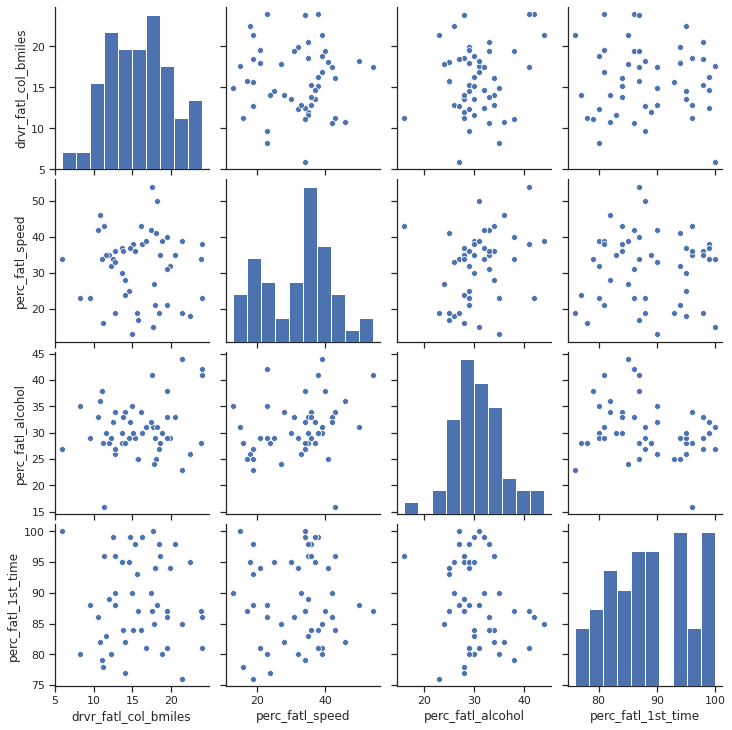

In [10]:
#scatter matrix plot
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(all_data[['drvr_fatl_col_bmiles','perc_fatl_speed','perc_fatl_alcohol','perc_fatl_1st_time']])

In [11]:
l = pd.DataFrame((range(1,53)))
all_data['id'] = l
all_data.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,million_miles_annually,target_var,#speed,#alchol,#first,id
0,Alabama,18.8,39,30,80,64914,1220383.2,475949.448,366114.960,976306.560,1
1,Alaska,18.1,41,25,94,4593,83133.3,34084.653,20783.325,78145.302,2
2,Arizona,18.6,35,28,96,59575,1108095.0,387833.250,310266.600,1063771.200,3
3,Arkansas,22.4,18,26,95,32953,738147.2,132866.496,191918.272,701239.840,4
4,California,12.0,35,28,89,320784,3849408.0,1347292.800,1077834.240,3425973.120,5


In [14]:
alt.renderers.enable('colab')

RendererRegistry.enable('colab')

In [13]:
import altair as alt
from vega_datasets import data

states = alt.topo_feature(data.us_10m.url, 'states')
variable_list = ['perc_fatl_speed', 'perc_fatl_alcohol', 'perc_fatl_1st_time']
chart = alt.Chart(states).mark_geoshape().encode(
    color='perc_fatl_speed:Q'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(all_data, key = 'id', fields = ['perc_fatl_speed'])
).properties(
    width=500,
    height=300
).project(
    type='albersUsa'
)
chart

alt.Chart(...)

In [15]:
states = alt.topo_feature(data.us_10m.url, 'states')
variable_list = ['perc_fatl_speed', 'perc_fatl_alcohol', 'perc_fatl_1st_time']
chart2 = alt.Chart(states).mark_geoshape().encode(
    color='perc_fatl_alcohol:Q'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(all_data, key = 'id', fields = ['perc_fatl_alcohol'])
).properties(
    width=500,
    height=300
).project(
    type='albersUsa'
)
chart2

alt.Chart(...)

In [16]:
states = alt.topo_feature(data.us_10m.url, 'states')
variable_list = ['perc_fatl_speed', 'perc_fatl_alcohol', 'perc_fatl_1st_time']
alt.Chart(states).mark_geoshape().encode(
    color='perc_fatl_1st_time:Q'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(all_data, key = 'id', fields = ['perc_fatl_1st_time'])
).properties(
    width=500,
    height=300
).project(
    type='albersUsa'
)

alt.Chart(...)

#MAP Visualization
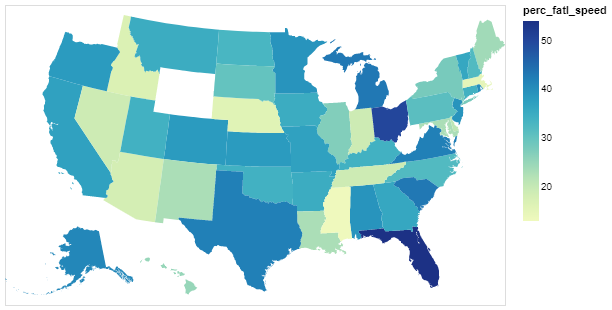

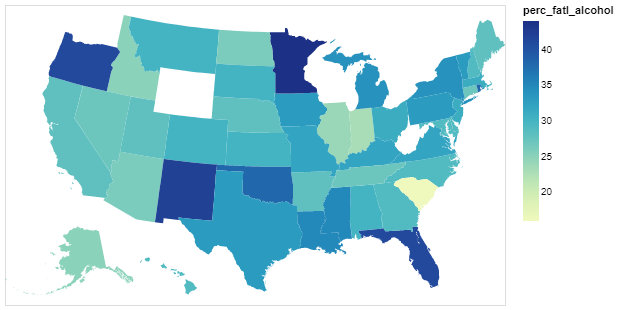

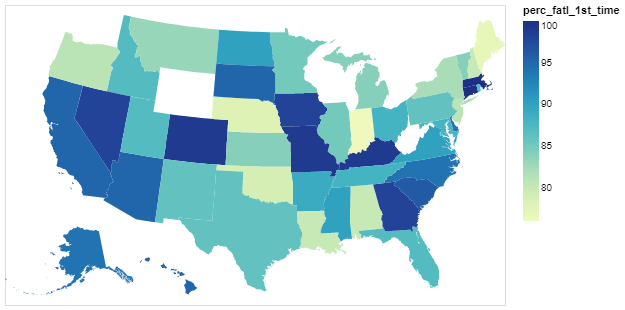

# Quantify the association of features and accidents
We can already see some potentially interesting relationships between the target variable (the number of fatal accidents) and the feature variables (the remaining three columns).
To quantify the pairwise relationships that we observed in the scatter plots, we can compute the Pearson correlation coefficient matrix. The Pearson correlation coefficient is one of the most common methods to quantify correlation between variables, and by convention, the following thresholds are usually used:
*   0.2 = weak
*   0.5 = medium
*   0.8 = strong
*   0.9 = very strong





In [19]:
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from numpy import cov
from scipy.stats import pearsonr
def pearson_coefficient(data1,data2,lab1,lab2):
  print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
  print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))
# plot
  plt.scatter(data1, data2)
  plt.show()
  plt.title('data1 vs data2')
#calculating covariance
  covariance = cov(data1, data2)
  print("The covariance matrix:",covariance)
  # calculate Pearson's correlation
  corr, _ = pearsonr(data1, data2)
  print('Pearson correlation coeficient between {} and {} is {}'.format(lab1,lab2,corr),end='\n Strength of correlation:')
  if corr<=0.2:
    print("weak")
  elif corr>0.2 and corr<=0.5:
    print('medium')
  elif corr>0.5 and corr<=0.8:
    print('strong')
  else:
    print('very strong')
  print('*******************************************')
  return

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
def normalize(dataset,c):
    dataset[c] = scaler.fit_transform(dataset[c].values.reshape(-1,1))
    return

cols = ['perc_fatl_speed','perc_fatl_alcohol','perc_fatl_1st_time','drvr_fatl_col_bmiles']
for col in cols:
  normalize(all_data,col)

data1: mean=0.549 stdv=0.227
data2: mean=0.457 stdv=0.233


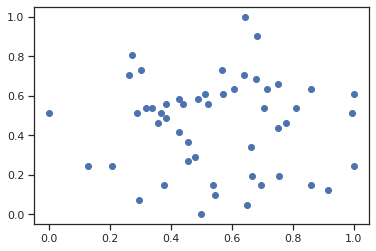

The covariance matrix: [[ 0.05244106 -0.0015647 ]
 [-0.0015647   0.0552071 ]]
Pearson correlation coeficient between target_var and perc_fatl_speed is -0.0290801459139906
 Strength of correlation:weak
*******************************************
data1: mean=0.549 stdv=0.227
data2: mean=0.525 stdv=0.181


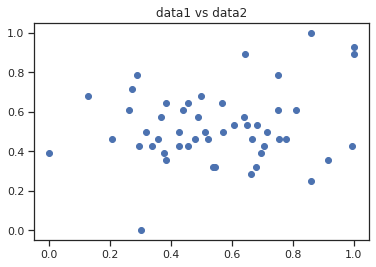

The covariance matrix: [[0.05244106 0.00837076]
 [0.00837076 0.03359644]]
Pearson correlation coeficient between target_var and perc_fatl_alcohol is 0.1994263437801119
 Strength of correlation:weak
*******************************************
data1: mean=0.549 stdv=0.227
data2: mean=0.530 stdv=0.287


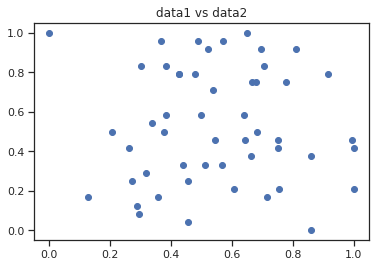

The covariance matrix: [[ 0.05244106 -0.00119154]
 [-0.00119154  0.08410267]]
Pearson correlation coeficient between target_var and perc_fatl_1st_time is -0.017941876874043555
 Strength of correlation:weak
*******************************************


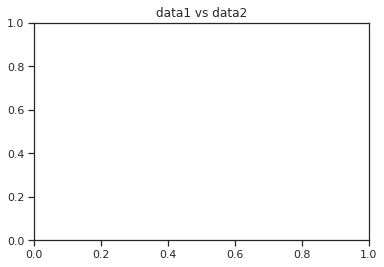

In [21]:
cols = ['perc_fatl_speed','perc_fatl_alcohol','perc_fatl_1st_time']
for c in cols:
  pearson_coefficient(all_data['drvr_fatl_col_bmiles'],all_data[c],'target_var',c)


In [23]:
print("Correlation between all the columns")
cr = all_data[['perc_fatl_speed','perc_fatl_alcohol','perc_fatl_1st_time','drvr_fatl_col_bmiles']].corr()
cr

Correlation between all the columns


,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,drvr_fatl_col_bmiles
perc_fatl_speed,1.000000,0.286244,0.014066,-0.029080
perc_fatl_alcohol,0.286244,1.000000,-0.245455,0.199426
perc_fatl_1st_time,0.014066,-0.245455,1.000000,-0.017942
drvr_fatl_col_bmiles,-0.029080,0.199426,-0.017942,1.000000


# Fit a multivariate linear regression


In [24]:
from sklearn import linear_model

# Create the features and target DataFrames
features = all_data[["perc_fatl_speed","perc_fatl_alcohol","perc_fatl_1st_time"]]
target = all_data["drvr_fatl_col_bmiles"]

# Create a linear regression object
reg = linear_model.LinearRegression()

# Fit a multivariate linear regression model
reg.fit(features, target)

# Retrieve the regression coefficients
fit_coef = reg.coef_
fit_coef

array([-0.09521205,  0.29689961,  0.03297734])

# Standardization of Data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled

array([[ 0.76264511, -0.1350496 , -1.26611685],
       [ 0.97232113, -1.1189824 ,  0.76536053],
       [ 0.34329308, -0.52862272,  1.05557158],
       [-1.43895304, -0.92219584,  0.91046605],
       [ 0.34329308, -0.52862272,  0.03983289],
       [ 0.5529691 , -0.52862272,  0.91046605],
       [ 1.49651116,  1.04566976, -0.9759058 ],
       [ 0.6578071 , -0.1350496 ,  1.49088816],
       [ 0.23845508, -0.72540928,  1.63599369],
       [-1.12443902, -0.33183616,  0.76536053],
       [-1.33411503, -1.1189824 ,  0.620255  ],
       [ 2.33521522,  2.02960256, -0.25037816],
       [ 0.44813109, -0.33183616,  1.34578263],
       [ 0.44813109,  0.65209664,  1.05557158],
       [-0.70508699, -0.33183616,  0.91046605],
       [-1.54379105, -1.1189824 , -0.25037816],
       [-0.49541097, -1.31576896, -0.54058922],
       [-1.33411503, -1.51255552, -1.84653896],
       [ 0.34329308,  0.45531008,  1.34578263],
       [ 0.6578071 , -0.1350496 , -0.68569475],
       [ 0.23845508,  0.25852352,  1.490

#Performing PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
# Fit the standardized data to the pca
pca.fit(features_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

#Visualize the first two principal components
We will create a scatter plot of the first principle components and explore how the states cluster together in this visualization.

In [ ]:

# Compute the cumulative proportion of variance explained by the first two principal components
two_first_comp_var_exp = pca.explained_variance_ratio_.cumsum()[1]
print("The cumulative variance of the first two principal components is {}".format(
    round(two_first_comp_var_exp, 5)))

The cumulative variance of the first two principal components is 0.7947


In [ ]:
# two principal components
pca = PCA(n_components=2)
p_comps = pca.fit_transform(features_scaled)
p_comps

array([[ 0.88463912,  0.46421102],
       [-0.62529903, -1.22024698],
       [-0.67169596, -1.02786253],
       [-1.83954608,  0.23991011],
       [-0.21174283, -0.25666671],
       [-0.49390467, -1.05414432],
       [ 1.98805561, -0.22697834],
       [-0.41984695, -1.56080846],
       [-1.13099129, -1.40144229],
       [-1.18444358,  0.14877025],
       [-1.79251216,  0.39090271],
       [ 2.80996806, -1.31802924],
       [-0.60664618, -1.31530775],
       [ 0.2268846 , -1.08935235],
       [-1.02598376, -0.23430583],
       [-1.51035032,  1.18838032],
       [-0.95893975,  0.72533611],
       [-0.95632936,  2.26156134],
       [-0.10099555, -1.24259045],
       [ 0.56576691,  0.091754  ],
       [-0.36316811, -1.28565771],
       [ 0.6900851 ,  1.56144575],
       [-0.03971211,  1.81587269],
       [-0.67811433,  0.67334261],
       [-1.63409399, -0.10065137],
       [ 1.40766864, -0.24488656],
       [ 2.52202483, -0.07092466],
       [-0.52740931,  1.14200056],
       [-0.19504256,

In [ ]:
p_comps.shape

(51, 2)

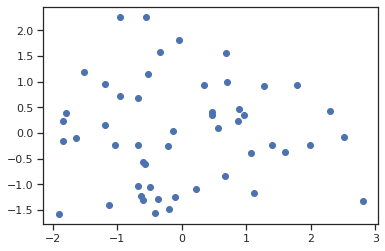

In [ ]:
p_comp1 = p_comps[:,0]
p_comp2 = p_comps[:,1]
plt.scatter(p_comp1,p_comp2)

#KMEANS clustering with Elbow method

In [ ]:
from sklearn.cluster import KMeans

wcss = [] 
#within custers sum of squares


for c in range(1,10):
  kmeans = KMeans(n_clusters=c, init='k-means++',max_iter=300,n_init=10,random_state=0)
  kmeans.fit(p_comps)
  wcss.append(kmeans.inertia_)

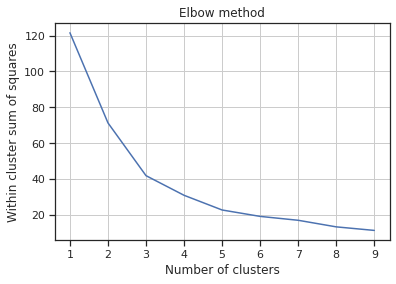

In [ ]:
#plotting the elbow method
plt.plot(range(1,10),wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster sum of squares')
plt.xticks(range(1,10))
plt.grid()
plt.show()

### *In the elbow method the number of clusters 3 is found to be optimal as the elbow ocurs at 3*

---



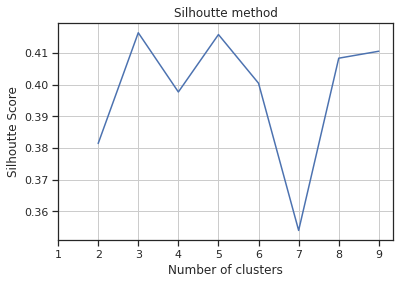

In [ ]:
sc = []
from sklearn.metrics import silhouette_score
#for silhouette coefficient we begin the number ofclusters as 2
for c in range(2,10):
  kmeans = KMeans(n_clusters=c, init='k-means++',max_iter=300,n_init=10,random_state=0)
  kmeans.fit(p_comps)
  score = silhouette_score(p_comps, kmeans.labels_)
  sc.append(score)
plt.plot(range(2,10),sc)
plt.title('Silhoutte method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte Score')
plt.xticks(range(1,10))
plt.grid()
plt.show()

## *Even by using Silhoutte method the number of clusters was found to be 3*

---



#K-Means clustering using 3 clusters

In [ ]:
km = KMeans(n_clusters=3, random_state=8)
fit_data = km.fit_transform(p_comps)

In [ ]:
fit_data

array([[2.0608972 , 0.60464523, 1.67027699],
       [0.54224419, 2.29988177, 2.5938492 ],
       [0.34618683, 2.24204882, 2.4041665 ],
       [1.40160577, 3.1517649 , 1.7398799 ],
       [0.74984786, 1.54376066, 1.6565622 ],
       [0.46655053, 2.10041074, 2.42563651],
       [2.83845547, 0.7295299 , 2.97222527],
       [0.93552006, 2.34644991, 2.93381898],
       [0.76268583, 2.82550875, 2.83980565],
       [0.93731654, 2.492492  , 1.39253483],
       [1.47629452, 3.11869602, 1.60815897],
       [3.66966907, 2.02013171, 4.27867238],
       [0.63817138, 2.33762302, 2.68815019],
       [1.10312899, 1.55411313, 2.57094429],
       [0.52290774, 2.34610312, 1.68417439],
       [2.02385727, 3.04461606, 1.00926284],
       [1.44321114, 2.36857353, 0.78227595],
       [2.97527572, 3.17731555, 0.99233412],
       [0.88591144, 1.89640917, 2.64698905],
       [1.59149783, 0.74203167, 1.6767766 ],
       [0.72805523, 2.12459143, 2.66152873],
       [2.72157652, 1.65055536, 1.22276403],
       [2.

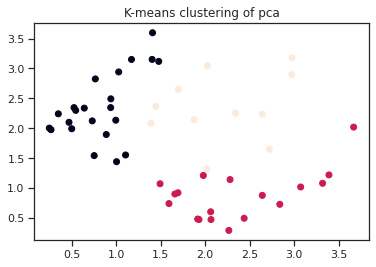

In [ ]:
plt.scatter(fit_data[:,0],fit_data[:,1],c = km.labels_)
plt.title('K-means clustering of pca')
plt.show()

In [ ]:
all_data['cluster'] = km.labels_
all_data.head(10)

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,million_miles_annually,target_var,#speed,#alchol,#first,id,cluster
0,Alabama,18.8,39,30,80,64914,1220383.2,475949.448,366114.960,976306.560,1,1
1,Alaska,18.1,41,25,94,4593,83133.3,34084.653,20783.325,78145.302,2,0
2,Arizona,18.6,35,28,96,59575,1108095.0,387833.250,310266.600,1063771.200,3,0
3,Arkansas,22.4,18,26,95,32953,738147.2,132866.496,191918.272,701239.840,4,0
4,California,12.0,35,28,89,320784,3849408.0,1347292.800,1077834.240,3425973.120,5,0
5,Colorado,13.6,37,28,95,46606,633841.6,234521.392,177475.648,602149.520,6,0
6,Connecticut,10.8,46,36,82,31197,336927.6,154986.696,121293.936,276280.632,7,1
7,Delaware,16.2,38,30,99,9028,146253.6,55576.368,43876.080,144791.064,8,0
8,District of Columbia,5.9,34,27,100,3568,21051.2,7157.408,5683.824,21051.200,9,0
9,Florida,17.9,21,29,94,191855,3434204.5,721182.945,995919.305,3228152.230,10,0


#Visualize the feature differences between the clusters

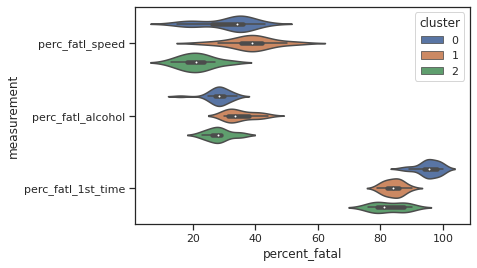

In [ ]:
new_df = pd.melt(all_data, id_vars="cluster", var_name="measurement", value_name="percent_fatal", value_vars=features)
sns.violinplot(x=new_df["percent_fatal"], y=new_df["measurement"], hue=new_df["cluster"])

In [ ]:
all_data['target_var'] /= 1000


In [ ]:
all_data['#speed'] /= 1000
all_data['#alchol'] /= 1000
all_data['#first'] /= 1000

In [ ]:
all_data.head(10)

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,million_miles_annually,target_var,#speed,#alchol,#first,id,cluster
0,Alabama,18.8,39,30,80,64914,1220.3832,475.949448,366.114960,976.306560,1,1
1,Alaska,18.1,41,25,94,4593,83.1333,34.084653,20.783325,78.145302,2,0
2,Arizona,18.6,35,28,96,59575,1108.0950,387.833250,310.266600,1063.771200,3,0
3,Arkansas,22.4,18,26,95,32953,738.1472,132.866496,191.918272,701.239840,4,0
4,California,12.0,35,28,89,320784,3849.4080,1347.292800,1077.834240,3425.973120,5,0
5,Colorado,13.6,37,28,95,46606,633.8416,234.521392,177.475648,602.149520,6,0
6,Connecticut,10.8,46,36,82,31197,336.9276,154.986696,121.293936,276.280632,7,1
7,Delaware,16.2,38,30,99,9028,146.2536,55.576368,43.876080,144.791064,8,0
8,District of Columbia,5.9,34,27,100,3568,21.0512,7.157408,5.683824,21.051200,9,0
9,Florida,17.9,21,29,94,191855,3434.2045,721.182945,995.919305,3228.152230,10,0


#Compute the number of accidents within each cluster

In [ ]:
all_data.groupby('cluster').target_var.size()

cluster
0    22
1    18
2    11
Name: target_var, dtype: int64

#Make a decision when there is no clear right choice

In [ ]:
all_data.groupby('cluster').target_var.agg(['sum','mean'])

,sum,mean
cluster,,
0,19764.3291,898.378595
1,16405.3159,911.406439
2,9465.5654,860.505945


## It can be observed that we need to consider those states in CLUSTER 1 to reduce the accidents as they have a larger mean

In [ ]:
print('States in USA that belong to cluster 1 are:')
print(all_data[all_data['cluster']==1].state)

States in USA that belong to cluster 1 are:
0            Alabama
6        Connecticut
11            Hawaii
19             Maine
25          Missouri
26           Montana
29     New Hampshire
33    North Carolina
34      North Dakota
35              Ohio
38      Pennsylvania
39      Rhode Island
40    South Carolina
41      South Dakota
43             Texas
47        Washington
49         Wisconsin
50           Wyoming
Name: state, dtype: object
States in USA that belong to cluster 1 are:
0            Alabama
6        Connecticut
11            Hawaii
19             Maine
25          Missouri
26           Montana
29     New Hampshire
33    North Carolina
34      North Dakota
35              Ohio
38      Pennsylvania
39      Rhode Island
40    South Carolina
41      South Dakota
43             Texas
47        Washington
49         Wisconsin
50           Wyoming
Name: state, dtype: object
